### Problem Description
Insurance companies take risks over customers. Risk management is a very important aspect of the insurance industry. Insurers consider every quantifiable factor to develop profiles of high and low insurance risks. Insurers collect vast amounts of information about policyholders and analyze the data.

As a Data scientist in an insurance company, you need to analyze the available data and predict whether to sanction the insurance or not.

### Dataset Description
A zipped file containing train, test and sample submission files are given. The training dataset consists of data corresponding to 52310 customers and the test dataset consists of 22421 customers. Following are the features of the dataset

Target: Claim Status (Claim)

Name of agency (Agency)

Type of travel insurance agencies (Agency.Type)

Distribution channel of travel insurance agencies (Distribution.Channel)

Name of the travel insurance products (Product.Name)

Duration of travel (Duration)

Destination of travel (Destination)

Amount of sales of travel insurance policies (Net.Sales)

The commission received for travel insurance agency (Commission)

Age of insured (Age)

The identification record of every observation (ID)

Evaluation Metric
The evaluation metric for this task will be precision_score. Read up about it more here.

### Submission Format
The user has to submit a csv file with the ID and Claim label. Sample submission file has been given to you. You can refer the sample submission file.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)
from imblearn.over_sampling import SMOTE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [16]:
path = './data/train.csv'

# Load the dataframe
data = pd.read_csv(path,delimiter=',')

# Remove the Id column from the dataset
# data.drop('Id',axis=1,inplace=True)

print('Shape of the data is: ',data.shape)

data.head()

Shape of the data is:  (52310, 11)


,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0


In [19]:
data[data['Age']==0]

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
17997,8825,TST,Travel Agency,Offline,Travel Cruise Protect,94,THAILAND,-30.0,10.5,0,0
30400,4748,TST,Travel Agency,Offline,Travel Cruise Protect,94,THAILAND,30.0,10.5,0,0


In [21]:
data[data['Net Sales']<=0].shape

(1840, 11)

In [24]:
data[data['Commision (in value)']<=0].shape

(26260, 11)

In [25]:
data[data['Duration']<=0].shape

(46, 11)

In [27]:
data[data['Duration']<0]

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
11523,9450,JZI,Airlines,Online,Basic Plan,-1,INDONESIA,18.0,6.3,118,0
15949,7015,JZI,Airlines,Online,Basic Plan,-1,BRUNEI DARUSSALAM,18.0,6.3,118,0
33398,4193,JZI,Airlines,Online,Basic Plan,-1,MALAYSIA,18.0,6.3,118,0
41424,7763,JZI,Airlines,Online,Basic Plan,-2,BANGLADESH,22.0,7.7,118,0


In [36]:
set(data[data['Age']>100]['Age'].values)

{101, 105, 108, 115, 117, 118}

In [3]:
#removing ID column
data.drop(columns=['ID'],axis=1,inplace=True)
data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0
4,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0


In [15]:
dest = set(data['Destination'].value_counts().index)
len(dest)

97

In [5]:
data['Claim'].value_counts()

0    43590
1     8720
Name: Claim, dtype: int64

In [6]:
data['Product Name'].value_counts()

Cancellation Plan                       13254
2 way Comprehensive Plan                10555
Rental Vehicle Excess Insurance          6813
Bronze Plan                              4723
Basic Plan                               4042
Silver Plan                              2862
1 way Comprehensive Plan                 2409
Annual Silver Plan                       2348
Value Plan                               1961
Ticket Protector                          780
Travel Cruise Protect                     394
Gold Plan                                 380
Annual Gold Plan                          295
Comprehensive Plan                        278
Single Trip Travel Protect Gold           251
Annual Travel Protect Gold                183
24 Protect                                165
Premier Plan                              141
Single Trip Travel Protect Silver         130
Single Trip Travel Protect Platinum       100
Annual Travel Protect Silver               92
Individual Comprehensive Plan     

In [4]:
# Predictors
X = data.iloc[:,:-1]

# Target
y = data.iloc[:,-1]

In [6]:
X.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age
0,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48
4,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36


In [7]:
# Function to detect outliers in every feature
def detect_outliers(dataframe):
    cols = list(dataframe)
    outliers = pd.DataFrame(columns=['Feature','Number of Outliers','Percentage','Fence Low','Fence High'])
    
    for column in cols:
        if column in dataframe.select_dtypes(include=np.number).columns:
            # first quartile (Q1)
            q1 = dataframe[column].quantile(0.25) 
            
            # third quartile (Q3)
            q3 = dataframe[column].quantile(0.75)
            
            # IQR
            iqr = q3 - q1
            
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column,
                                        'Number of Outliers':dataframe.loc[(dataframe[column] < fence_low) 
                                                                           | (dataframe[column] > fence_high)]
                                        .shape[0], 'Percentage':(dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0]/len(dataframe))*100,
                                       'Fence Low': fence_low, 'Fence High': fence_high},
                                       ignore_index=True)
    return outliers
temp = detect_outliers(X)
temp


,Feature,Number of Outliers,Percentage,Fence Low,Fence High
0,Duration,5484,10.483655,-60.50,127.50
1,Net Sales,5335,10.198815,-33.00,107.80
2,Commision (in value),6394,12.223284,-20.07,33.45
3,Age,3675,7.025425,18.00,58.00


In [8]:
from scipy.stats.mstats import winsorize
# Function to treat outliers 
def treat_outliers(dataframe):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.select_dtypes(include=np.number).columns:
            dataframe[col] = winsorize(dataframe[col], limits=[0.05, 0.1],inclusive=(True, True))
    
    return dataframe    


df = treat_outliers(X)

# Checking for outliers after applying winsorization
detect_outliers(X)

,Feature,Number of Outliers,Percentage,Fence Low,Fence High
0,Duration,5484,10.483655,-60.50,127.50
1,Net Sales,0,0.000000,-33.00,107.80
2,Commision (in value),6394,12.223284,-20.07,33.45
3,Age,0,0.000000,18.00,58.00


In [9]:
#Treat Skewness
import scipy.stats as scs

features = []
skewness = []
for i in X.select_dtypes(include=np.number).columns:
    features.append(i)
    skewness.append(scs.skew(X[i]))
skewed = pd.DataFrame({'Features':features,'Skewness':skewness})

# If skewness is greater than 1 the feature is highly positively skewed
positively_skewed_variables = skewed[(skewed['Skewness']>1)]

# If the skewness is less than -1 the feature is highly negatively skewed.
negatively_skewed_variables = skewed[(skewed['Skewness']<-1)]

print('Positively Skewed Features \n',positively_skewed_variables)
print('*'*50)
print('Negatively Skewed Features \n',negatively_skewed_variables) 

for i in positively_skewed_variables['Features']:
     X[i] = np.log1p(X[i])
# Let's remove the skewness in the positively skewed variables by using a log transform
# for i in positively_skewed_variables['Features']:
#     X[i] = np.log1p(X[i])

Positively Skewed Features 
                Features  Skewness
0              Duration  1.232835
1             Net Sales  1.014536
2  Commision (in value)  1.396855
**************************************************
Negatively Skewed Features 
 Empty DataFrame
Columns: [Features, Skewness]
Index: []


In [10]:
# Let's remove the skewness in the positively skewed variables by using a log transform
for i in positively_skewed_variables['Features']:
     X[i] = np.log1p(X[i])

In [11]:
# Checking for outliers after applying winsorization
detect_outliers(X)

,Feature,Number of Outliers,Percentage,Fence Low,Fence High
0,Duration,0,0.0,0.625709,2.218901
1,Net Sales,0,0.0,1.065743,1.943747
2,Commision (in value),0,0.0,-1.948586,3.247643
3,Age,0,0.0,18.000000,58.000000


In [12]:
#Check for Class Imbalance
def class_imbalance(target):
    class_values = (target.value_counts()/target.value_counts().sum())*100
    return class_values

class_imbalance(data['Claim'])

0    83.330147
1    16.669853
Name: Claim, dtype: float64

In [13]:
le = LabelEncoder()
# Function that auto encodes any dataframe column of type category or object.
def dummyEncode(dataset):
        
        columnsToEncode = list(dataset.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                dataset[feature] = le.fit_transform(dataset[feature])
            except:
                print('Error encoding '+feature)
        return dataset
data = dummyEncode(data)


In [14]:
# Predictors
X = data.iloc[:,:-1]

# Target
y = data.iloc[:,-1]

## By remove outlier and check on submission 2 our model was improved  

In [15]:
def XGboost(dataframe,target):
    
    x_train,x_val,y_train,y_val = train_test_split(dataframe,target, test_size=0.3, random_state=42)
 
    global xgbc
    rfc_clf=RandomForestClassifier()
    xgbc = XGBClassifier(base_estimator=rfc_clf, random_state=42, learning_rate=0.8, gamma=0.7, max_depth=8, min_child_weight=5, scale_pos_weight=0.1, grow_policy='lossguide')
    xgbc.fit(x_train, y_train)
    y_pred=xgbc.predict(x_val)
    precision=precision_score(y_val,y_pred)
    return precision

#trainning
precision = XGboost(X,y)    
print('score is:',precision)

#testing function
def prediction(test):
    y_pred = xgbc.predict(test)
    
    return y_pred

test=pd.read_csv('./data/test.csv')

# Storing the Id column
Id = test[['ID']]

# Preprocessed Test File
test.drop('ID',1,inplace=True)
test.head()
#label encoder
test = dummyEncode(test)
test.head()

#predicting on test file
y_pred = pd.DataFrame(prediction(test),columns=['Claim']) 
print(y_pred['Claim'].value_counts())

score is: 0.9578606158833063
0    21573
1      848
Name: Claim, dtype: int64


In [72]:
X.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age
0,7,1,1,10,61.0,68,12.0,0.00,41
1,7,1,1,10,4.0,53,17.0,0.00,35
2,6,1,1,16,26.0,84,19.8,11.88,47
3,7,1,1,1,15.0,33,27.0,0.00,48
4,7,1,1,1,15.0,53,37.0,0.00,36


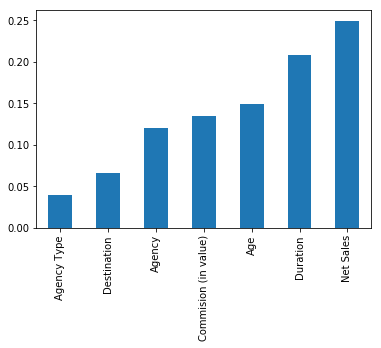

['Agency Type', 'Destination', 'Agency', 'Commision (in value)', 'Age', 'Duration', 'Net Sales']


In [73]:
# Feature Selection in Random Forest
def rfc_feature_selection(dataset,target):
    X_train, X_test, y_train, y_test = train_test_split(dataset, target, test_size=0.3, random_state=42, stratify=target)
    rfc = RandomForestClassifier(random_state=42)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    rfc_importances = pd.Series(rfc.feature_importances_, index=dataset.columns).sort_values().tail(7)
    rfc_importances.plot(kind='bar')
    plt.show()
    return  (rfc_importances.index).tolist()

col = rfc_feature_selection(X,y)
print(col)

In [74]:
X = X[col]
X.head()

,Agency Type,Destination,Agency,Commision (in value),Age,Duration,Net Sales
0,1,68,7,0.00,41,61.0,12.0
1,1,53,7,0.00,35,4.0,17.0
2,1,84,6,11.88,47,26.0,19.8
3,1,33,7,0.00,48,15.0,27.0
4,1,53,7,0.00,36,15.0,37.0


In [14]:
#Grid Search for Random Forest For find out Best Parameter for Random Forest
def grid_search_random_forrest(dataframe,target):

    x_train,x_val,y_train,y_val = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)
    rfc = RandomForestClassifier()
    param_grid = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
    }
    grid_search_model = GridSearchCV(rfc, param_grid=param_grid,n_jobs=-1)
    grid_search_model.fit(x_train, y_train)
    print('Best Parameters are:')
    return grid_search_model.best_params_


grid_search_random_forrest(X,y)

Best Parameters are:


{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto'}

In [75]:
#Ensembling
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.ensemble import VotingClassifier


def ensemble_func2(dataframe,target):
    
    x_train,x_val,y_train,y_val = train_test_split(dataframe, target, test_size=0.3, random_state=42)

    smote = SMOTE(kind='regular')
    X_sm, y_sm =  smote.fit_sample(x_train, y_train)
    
    
    model1 = RandomForestClassifier()
    model3 = GradientBoostingClassifier()
    model2 = LogisticRegression()
    
    model = VotingClassifier(estimators=[('rf', model1), ('lr', model2), ('xgb',model3)], voting='soft')
    model.fit(X_sm,y_sm)
    y_pred = model.predict(x_val)
    model.score(x_val,y_val)

    print('Classification Report:')
    print(classification_report(y_val, y_pred))
    print('Preciion score:')
    print(precision_score(y_val, y_pred))
    print(confusion_matrix(y_val, y_pred))
    
#     plt.clf()
#     plt.plot(false_positive_rate, true_positive_rate)
#     plt.xlabel('FPR')
#     plt.ylabel('TPR')
#     plt.title('ROC curve')
#     plt.show()
    
ensemble_func2(X,y)

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.90      0.93     13081
          1       0.61      0.83      0.71      2612

avg / total       0.91      0.88      0.89     15693

Preciion score:
0.6147937411095306
[[11727  1354]
 [  451  2161]]


In [82]:
#Ensembling
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.ensemble import VotingClassifier


def ensemble_func2(dataframe,target):
    
    x_train,x_val,y_train,y_val = train_test_split(dataframe, target, test_size=0.3, random_state=42)

    smote = SMOTE(kind='regular')
    X_sm, y_sm =  smote.fit_sample(x_train, y_train)
    
    
    model1 = RandomForestClassifier()
    model3 = GradientBoostingClassifier()
    model2 = LogisticRegression()
    
    model = VotingClassifier(estimators=[('rf', model1), ('lr', model2), ('xgb',model3)], voting='hard')
    model.fit(X_sm,y_sm)
    y_pred = model.predict(x_val)
    model.score(x_val,y_val)

    print('Classification Report:')
    print(classification_report(y_val, y_pred))
    print('Preciion score:')
    print(precision_score(y_val, y_pred))
    print(confusion_matrix(y_val, y_pred))
    
#     plt.clf()
#     plt.plot(false_positive_rate, true_positive_rate)
#     plt.xlabel('FPR')
#     plt.ylabel('TPR')
#     plt.title('ROC curve')
#     plt.show()
    
ensemble_func2(X,y)

Classification Report:
             precision    recall  f1-score   support

          0       0.95      0.87      0.91     13081
          1       0.53      0.76      0.63      2612

avg / total       0.88      0.85      0.86     15693

Preciion score:
0.5322754168908015
[[11342  1739]
 [  633  1979]]


In [76]:
def random_forrest(dataframe,target):
    
    x_train,x_val,y_train,y_val = train_test_split(dataframe,target, test_size=0.3, random_state=42)
    
    # Applying Smote on train data for dealing with class imbalance
    smote = SMOTE(kind='regular')
    X_sm, y_sm =  smote.fit_sample(x_train, y_train)
    
    global rfc
    rfc = RandomForestClassifier(n_estimators=500, max_features='auto', max_depth=8, criterion='gini',random_state=42)
    rfc.fit(x_train, y_train)
    y_pred=rfc.predict(x_val)
    precision=precision_score(y_val,y_pred)
    return precision

#trainning
precision = random_forrest(X,y)    
print('score is:',precision)

#testing function
def prediction(test):
    y_pred = rfc.predict(test)
    
    return y_pred

test=pd.read_csv('./data/test.csv')

# Storing the Id column
Id = test[['ID']]

# Preprocessed Test File
test.drop('ID',1,inplace=True)
test.head()
#label encoder
test = dummyEncode(test)
test = test[col]
test.head()
#predicting on test file
y_pred = pd.DataFrame(prediction(test),columns=['Claim']) 
print(y_pred['Claim'].value_counts())

score is: 0.6421117249846532
0    20038
1     2383
Name: Claim, dtype: int64


In [77]:
def random_forrest(dataframe,target):
    
    x_train,x_val,y_train,y_val = train_test_split(dataframe,target, test_size=0.3, random_state=42)
    
    # Applying Smote on train data for dealing with class imbalance
    smote = SMOTE(kind='regular')
    X_sm, y_sm =  smote.fit_sample(x_train, y_train)
    
    global rfc
    rfc = RandomForestClassifier()
    rfc.fit(x_train, y_train)
    y_pred=rfc.predict(x_val)
    precision=precision_score(y_val,y_pred)
    return precision

#trainning
precision = random_forrest(X,y)    
print('score is:',precision)

#testing function
def prediction(test):
    y_pred = rfc.predict(test)
    
    return y_pred

test=pd.read_csv('./data/test.csv')

# Storing the Id column
Id = test[['ID']]

# Preprocessed Test File
test.drop('ID',1,inplace=True)
test.head()
#label encoder
test = dummyEncode(test)
test = test[col]
test.head()
#predicting on test file
y_pred = pd.DataFrame(prediction(test),columns=['Claim']) 
print(y_pred['Claim'].value_counts())

score is: 0.8112290008841733
0    19223
1     3198
Name: Claim, dtype: int64


In [81]:
y_pred['Claim'].value_counts()/y_pred['Claim'].value_counts().sum()*100

0    85.736586
1    14.263414
Name: Claim, dtype: float64

In [63]:

#predicting on test file
y_pred = pd.DataFrame(prediction(test),columns=['Claim']) 
print(y_pred['Claim'].value_counts())

0    19220
1     3201
Name: Claim, dtype: int64
